In [76]:
import sys
sys.path.append("../../")
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
with open("./S1-DN-eval.pkl", "rb") as f:
    sim_tracker_DN = pickle.load(f)
with open("./S1-revisit-eval.pkl", "rb") as f:
    sim_tracker_revisit = pickle.load(f)
    
with open("./S1-smart-random-eval.pkl", "rb") as f:
    sim_tracker_random = pickle.load(f)
    
with open("./S1-q-table-eval.pkl", "rb") as f:
    sim_tracker_qt = pickle.load(f)
    
with open("./S1-DQN-eval.pkl", "rb") as f:
    sim_tracker_dqn = pickle.load(f)    
SIMS = [sim_tracker_random, sim_tracker_revisit, sim_tracker_qt, sim_tracker_dqn]
labels = ['Random', '90-min Revisit', 'Q-Table', 'DQN']

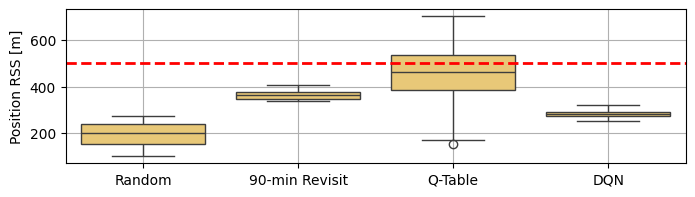

In [78]:

data = []

for sim in SIMS:
    data.append(sim.uncertainty_static)

plt.figure(figsize=(8, 2))
sns.boxplot(data=data ,color="#FBD065")
plt.axhline(y=np.mean(sim_tracker_DN.uncertainty_static), color='red', linestyle='--', linewidth=2)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Position RSS [m]')
plt.grid()
plt.show()

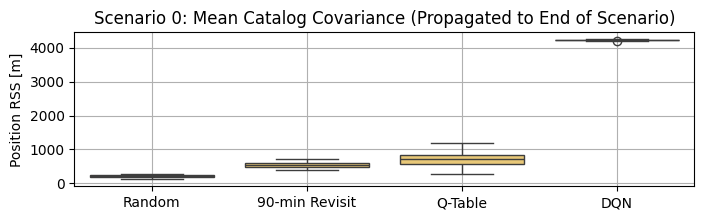

In [82]:


data = []

for sim in SIMS:
    data.append(sim.uncertainty_prop)

plt.figure(figsize=(8, 2))
sns.boxplot(data=data ,color="#FBD065")
#plt.axhline(y=np.mean(sim_tracker_DN.uncertainty_prop), color='red', linestyle='--', linewidth=2)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Position RSS [m]')
plt.title('Scenario 0: Mean Catalog Covariance (Propagated to End of Scenario)')
plt.grid()
plt.show()

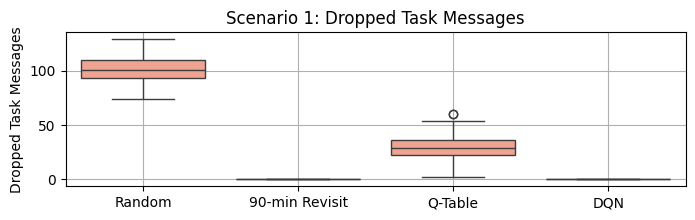

In [81]:

data = []
for sim in SIMS:
    data.append(sim.dropped_scheduling)

plt.figure(figsize=(8, 2))
sns.boxplot(data=data ,color="#FF9980")
#plt.axhline(y=np.mean(sim_tracker_DN.dropped_scheduling), color='red', linestyle='--', linewidth=2)
plt.xticks(list(range(len(labels))), labels)
plt.ylabel('Dropped Task Messages')
plt.title('Scenario 1: Dropped Task Messages')

plt.grid()
plt.show()